# Imports

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20, 10
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings('ignore')


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.1.3 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "C:\Users\Dell\AppData\Roaming\Python\Python311\site-packages\ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "C:\Users\Dell\AppData\Roaming\Python\Python311\site-packages\traitlets\config\application.py", line 1075, in launch_instance
    app.start()
  File "C:\Users\Dell\AppData\Roaming\Python\Python311\site-packages\ipykernel\kernelapp.py", line 739, in start
    self.io_loop.

AttributeError: _ARRAY_API not found

In [2]:
df = pd.read_csv("dataset/NSE-Tata.csv")
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4642146.0,10062.83
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,3519515.0,7407.06
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,1728786.0,3815.79
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,1708590.0,3960.27
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,1534749.0,3486.05


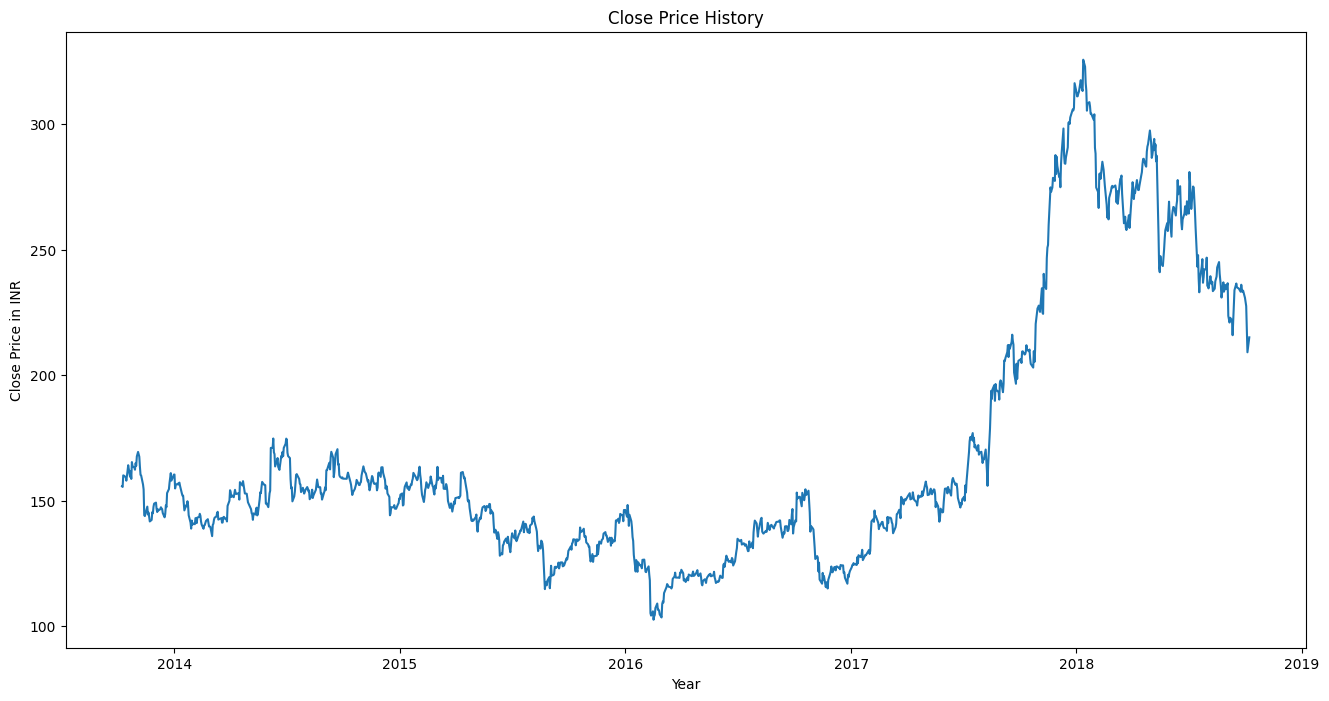

In [3]:
# Analyze the closing prices
df["Date"] = pd.to_datetime(df.Date, format="%Y-%m-%d")
df.index = df['Date']

plt.figure(figsize=(16, 8))
plt.plot(df['Close'])
plt.xlabel('Year')
plt.ylabel('Close Price in INR')

plt.title('Close Price History')
plt.show()

In [4]:
data = df.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(index=range(0, len(df)), columns=['Date', 'Close'])

for i in range(0, len(data)):
    new_data['Date'][i] = data['Date'][i]
    new_data['Close'][i] = data['Close'][i]

new_data.head()

,Date,Close
0,2013-10-08 00:00:00,155.8
1,2013-10-09 00:00:00,155.55
2,2013-10-10 00:00:00,160.15
3,2013-10-11 00:00:00,160.05
4,2013-10-14 00:00:00,159.45


In [5]:
# Normalize the new filtered dataset

scaler = MinMaxScaler(feature_range=(0, 1))
final_data = new_data.values

train_data = final_data[0:987, :]
validation_data = final_data[987:, :]

new_data.index = new_data.Date
new_data.drop('Date', axis=1, inplace=True)
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(new_data)

x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(scaled_data[i-60:i, 0])
    y_train.append(scaled_data[i, 0])

x_train = np.array(x_train)
y_train = np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [6]:
# Building and training the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))

input_data = new_data[len(new_data) - len(validation_data) - 60:].values
input_data = input_data.reshape(-1, 1)
input_data = scaler.transform(input_data)

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=20, batch_size=32, verbose=2)

Epoch 1/20
29/29 - 4s - 121ms/step - loss: 0.0052
Epoch 2/20
29/29 - 1s - 25ms/step - loss: 0.0014
Epoch 3/20
29/29 - 1s - 25ms/step - loss: 0.0013
Epoch 4/20
29/29 - 1s - 26ms/step - loss: 0.0011
Epoch 5/20
29/29 - 1s - 27ms/step - loss: 0.0011
Epoch 6/20
29/29 - 1s - 26ms/step - loss: 9.9557e-04
Epoch 7/20
29/29 - 1s - 25ms/step - loss: 9.6363e-04
Epoch 8/20
29/29 - 1s - 25ms/step - loss: 9.0679e-04
Epoch 9/20
29/29 - 1s - 25ms/step - loss: 9.2146e-04
Epoch 10/20
29/29 - 1s - 25ms/step - loss: 8.9929e-04
Epoch 11/20
29/29 - 1s - 25ms/step - loss: 9.0313e-04
Epoch 12/20
29/29 - 1s - 24ms/step - loss: 7.6580e-04
Epoch 13/20
29/29 - 1s - 23ms/step - loss: 7.6956e-04
Epoch 14/20
29/29 - 1s - 25ms/step - loss: 8.4772e-04
Epoch 15/20
29/29 - 1s - 24ms/step - loss: 7.7612e-04
Epoch 16/20
29/29 - 1s - 24ms/step - loss: 7.3816e-04
Epoch 17/20
29/29 - 1s - 25ms/step - loss: 7.0379e-04
Epoch 18/20
29/29 - 1s - 24ms/step - loss: 6.6007e-04
Epoch 19/20
29/29 - 1s - 25ms/step - loss: 6.9067e-04
Ep

In [7]:
# Taking a sample of the dataset to predict the stock price
x_test = []
for i in range(60, input_data.shape[0]):
    x_test.append(input_data[i-60:i, 0])
x_test = np.array(x_test)

x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
predicted_stock_price = model.predict(x_test)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step


In [8]:
model.save('model.h5')

Text(0.5, 1.0, 'Actual stock price vs Predicted Stock Price')

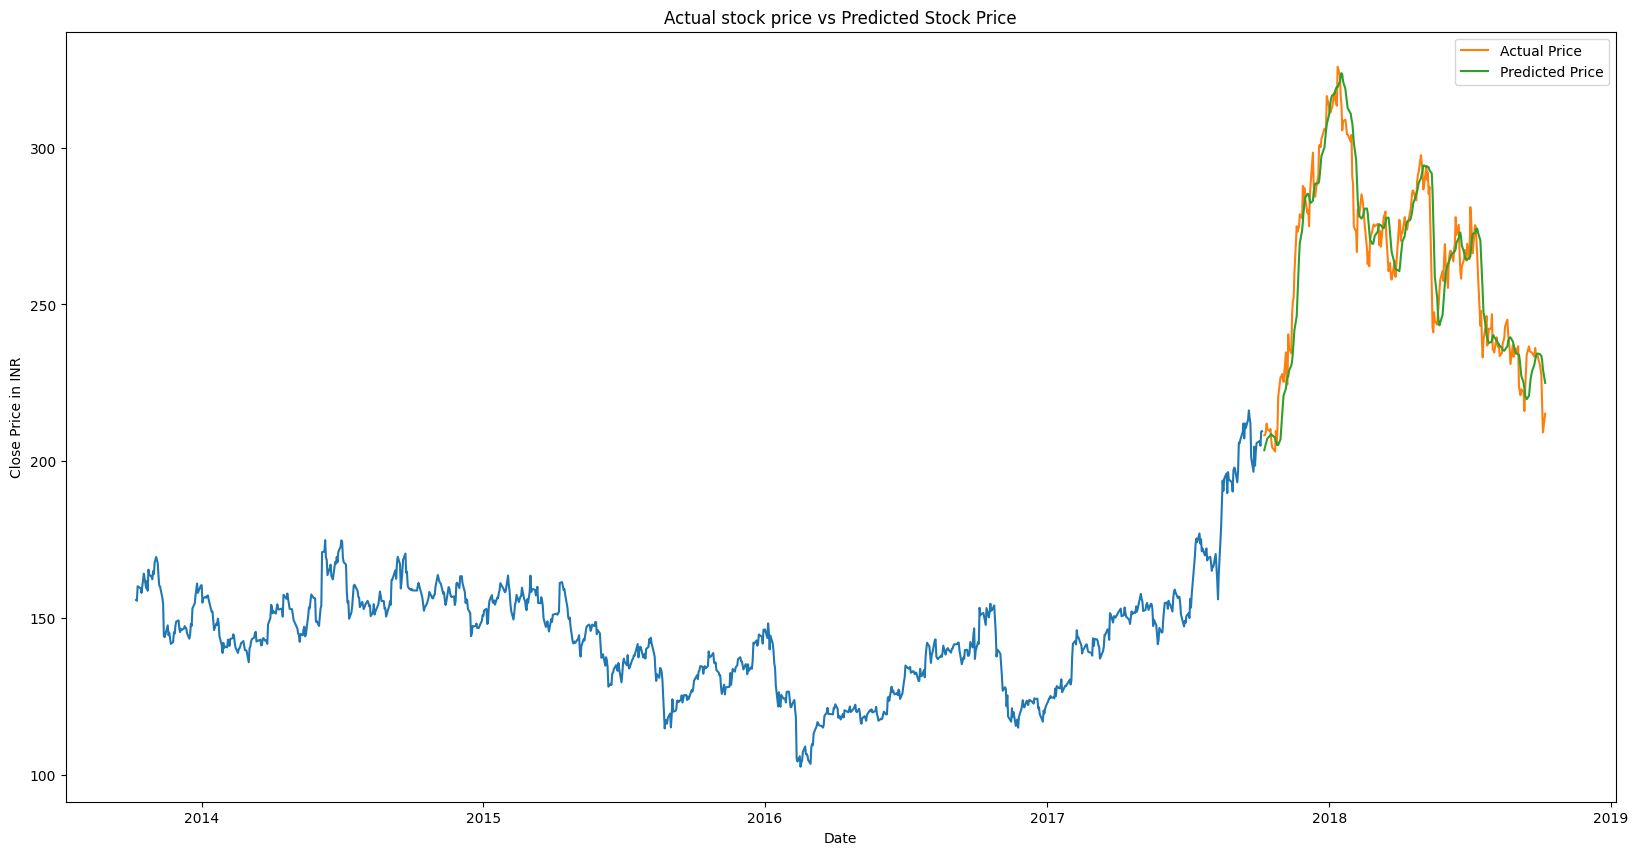

In [ ]:
train_data = new_data[:987]
valid_data = new_data[987:]

valid_data['Predictions'] = predicted_stock_price

plt.plot(train_data['Close'])
plt.plot(valid_data['Close'], label='Actual Price')
plt.plot(valid_data['Predictions'], label='Predicted Price')
plt.xlabel('Date')
plt.ylabel('Close Price in INR')
plt.legend()

plt.title('Actual stock price vs Predicted Stock Price')